## 4. Vensl á heiltölum (25 stig)

**Búið til vensl á mengi heiltalnanna $A = \{1, 2, 3, 4\}$ með fylki í `Python` eða `R` samkvæmt
eftirfarandi leiðbeiningum:**

1. Notið afmælisdagana ykkar til að setja slembifræ (e. random seed).
2. Búið til $4 \times 4$ fylki með slembibreyttum gildum sem eru 0 eða 1.
3. Forritið virkni sem skoðar eiginleika venslanna: athugið hvort þau
   séu sjálfhverf, samhverf, andsamhverf, og gegnvirk.
4. Sannreynið niðurstöður forritsins með því að skoða venslin myndrænt með örvaneti.

Athugið, þið þurfið að uppfæra `README` skjalið til að útskýra hvernig eigi að keyra kóðann ykkar
(og hvaða pakka þarf að setja upp, ef við á). Þar sem þið eruð að endurtaka þetta fyrir allar
afmælisdaga hópmeðlima þá er ráðlagt að setja upp fall sem tekur inn dagsetninguna og skilar
niðurstöðum.

### Python Kóði

```python
# Búa til slembifræ/seed út frá dagsetningunni
seed = int(f"{dd:02d}{mm:02d}{yyyy}")
np.random.seed(seed)

# Búa til 4x4 slembifylki með 0 eða 1
fylki = np.random.randint(0, 2, size=(4, 4))

# Endirskrifa dagssetninguna á formið "dd-mm-yyyy"
formatted_date = f"{dd:02d}-{mm:02d}-{yyyy}"

# Prenta niðurstöður:
print(f"Fylkið fyrir dagsetninguna {formatted_date} og seed {seed}:")
print(fylki)
print()
```

In [5]:
pip install numpy matplotlib networkx

  Using cached numpy-2.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached numpy-2.1.0-cp312-cp312-macosx_11_0_arm64.whl (13.5 MB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3

Fylkið fyrir dagsetninguna 03-02-2004 með seed 3022004:
[[1 1 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]]

Fylkið er sjálfhverft: False
Fylkið er samhverft: False
Fylkið er andsamhverft: False
Fylkið er gegnvirkt: False



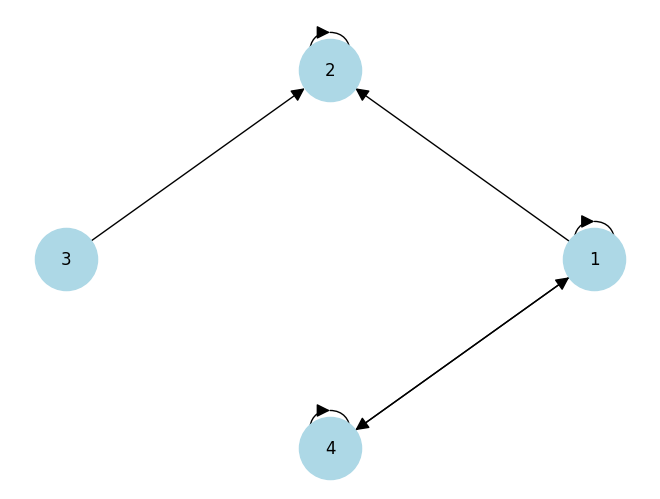

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Fall til að athuga eiginleika vensla
def athuga_vensl(fylki):
    n = fylki.shape[0]

    # Athugar hvort fylkið sé sjálfhverft (reflexive)
    sjalfhverf = np.all(np.diag(fylki) == 1)

    # Athugar hvort fylkið sé samhverft (symmetric)
    samhverf = np.all(fylki == fylki.T)

    # Athugar hvort fylkið sé andsamhverft (antisymmetric)
    andsamhverf = np.all((fylki * fylki.T) == np.diag(np.diag(fylki)))

    # Athugar hvort fylkið sé gegnvirkt (transitive)
    gegnvirk = np.all(np.dot(fylki, fylki) <= fylki)

    return sjalfhverf, samhverf, andsamhverf, gegnvirk

# Fall til að teikna örvanetið fyrir fylkið
def teikna_orvanet(fylki):
    G = nx.DiGraph()
    n = fylki.shape[0]
    nodes = list(range(1, n + 1))
    G.add_nodes_from(nodes)
    
    for i in range(n):
        for j in range(n):
            if fylki[i, j] == 1:
                G.add_edge(nodes[i], nodes[j])
    
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowstyle='-|>', arrowsize=20)
    plt.show()

# Setja upp slembifræ út frá afmælisdegi
def bua_til_fylki(dagur, manudur, ar):
    seed = int(f"{dagur:02d}{manudur:02d}{ar}")
    np.random.seed(seed)
    
    # Búa til 4x4 slembifylki með 0 eða 1
    fylki = np.random.randint(0, 2, size=(4, 4))
    
    # Athuga eiginleika vensla
    sjalfhverf, samhverf, andsamhverf, gegnvirk = athuga_vensl(fylki)
    
    # Prenta niðurstöður
    print(f"Fylkið fyrir dagsetninguna {dagur:02d}-{manudur:02d}-{ar} með seed {seed}:")
    print(fylki)
    print()
    print(f"Fylkið er sjálfhverft: {sjalfhverf}")
    print(f"Fylkið er samhverft: {samhverf}")
    print(f"Fylkið er andsamhverft: {andsamhverf}")
    print(f"Fylkið er gegnvirkt: {gegnvirk}")
    print()
    
    # Teikna örvanetið
    teikna_orvanet(fylki)

# Dæmi um keyrslu með dagsetningu
bua_til_fylki(3, 2, 2004)
